# 1. Defining The Question.

### a) Specifying the Question





Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. As a data scientist i have been tasked to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success

This project will be successful when:

1)We Identify the most crucial independent variables that affect Hypothyroidism.

2)The model achieves atleast 90% accuracy

3)Have the lowest RMSE score possible

### c) Understanding the context

Hypothyrodism is a condition where the body produces too little thyroxine. Low thyroxine levels cause problems with development if it occurs when an individual is young. In adults, thyroxine deficiency will lower the metabolic rate, causing weight gain, memory problems, infertility, fatigue, and muscle stiffness.

Thyroxine: is a hormone secreted in the thyroid glands into the bloodstream. It plays a crucial role in heart and digestive function, metabolism, brain development, bone health, and muscle control. It affects almost all of the body's systems, which means proper thyroxine levels are vital for health.

### d) Recording the Experimental Design



> The following are the experimental design i took in order to complete this project:


* Exploratory Data Analysis

* Data Cleaning

* Univariate Analysis

* Bivariate Analysis

* Multivariate Analysis


* Decision Trees: Random Forests , Ada Boosted Trees , Gradient Boosted Trees

* Support Vector Machines: Kernel = polynomial , linear , rbf

* Conclusion





### e) Data Relevance

Source [[link]](http://bit.ly/hypothyroid_data)

The Dataset has the following Columns
Age,
Sex,
on_thyroxine,
query_on_thyroxine,
on_antithyroid_medicationthyroid_surgery,
query_hypothyroid,
query_hyperthyroid,
pregnant,
sick,
tumor,
lithium,
goitre,
TSH_measured,
TSH,
T3_measured,
T3,
TT4_measured and 
TT4. This will help us determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

# 2. Reading The Data.

In [1]:
#importing our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC,LinearSVC

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#reading our data
data= pd.read_csv('/content/hypothyroid.csv')

# 3. Checking The Data.

In [3]:
# Determining the no. of records in our datasets
data.shape

(3163, 26)

In [4]:
# columns in our data set
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [5]:
# Previewing the top of our dataset
data.head()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [6]:
# previewing the last observations of the data
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [7]:
# checking for null values
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

As we can see here python does not recognise question marks as null values hence we will replace the question marks with nan to see how mant null values our dataset has.

In [8]:
# converting the question marks to nan
data = data.replace('?', np.nan)
data.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

correct! now we can clearly see the sum of our null values in the age, sex, TSH,T3,TT4,T4U, FTI and TBG which has the highest number. We will deal with them accordingly when we are tyding the dataset.

In [9]:
# checking for duplicates
data.duplicated().sum()

77

77 duplicates are in our data

In [10]:
# Checking whether each column has an appropriate datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        2717 non-null   object
 2   sex                        3090 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [11]:
#Describing our data
data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,2717,3090,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,2695,3163,2468,3163,2914,3163,2915,3163,2916,3163,260
unique,2,92,2,2,2,2,2,2,2,2,2,2,2,2,2,239,2,69,2,268,2,158,2,280,2,52
top,negative,59,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,98,y,0.98,y,98,n,28
freq,3012,64,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,141,2914,50,2915,86,2916,55,2903,14


In [12]:
data.mode()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,negative,59,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1.60,y,98,y,0.98,y,107,n,28
1,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.80,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN


# 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number.

# 5. Tidying the Dataset

In [0]:
#dropping the duplicates
data = data.drop_duplicates(keep = 'first')

In [14]:
# confirming if the duplicates have been dropped
data.duplicated().any()

False

In [15]:
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [16]:


#Ensuring that all data is the correct data type.
def create_null(X, columns):
  for i in columns:
    X[i] = pd.to_numeric(X[i], errors='coerce')
num_col=['age','TSH','T3','TT4','T4U','FTI']  

create_null(data, num_col)

data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3086 non-null   object 
 1   age                        2648 non-null   float64
 2   sex                        3013 non-null   object 
 3   on_thyroxine               3086 non-null   object 
 4   query_on_thyroxine         3086 non-null   object 
 5   on_antithyroid_medication  3086 non-null   object 
 6   thyroid_surgery            3086 non-null   object 
 7   query_hypothyroid          3086 non-null   object 
 8   query_hyperthyroid         3086 non-null   object 
 9   pregnant                   3086 non-null   object 
 10  sick                       3086 non-null   object 
 11  tumor                      3086 non-null   object 
 12  lithium                    3086 non-null   object 
 13  goitre                     3086 non-null   objec

In [17]:
# handling the null values
# We fill the missing values in the sex column with the mode
data.sex.fillna('F', inplace = True)
# For all the numerical columns we fill the missing values with the mean
num_col=['age','TSH','T3','TT4','T4U','FTI']
for column in num_col:
  data[column].fillna(data[column].mean(), inplace = True)
  
# Then drop TBG_Measured and TBG columns since TBG has a lot of missing values and may not be of help in our analysis.


data.drop(['TBG', 'TBG_measured'], axis = 1, inplace = True)

# confirming if the nulls are dropped
data.isnull().sum().any()

False

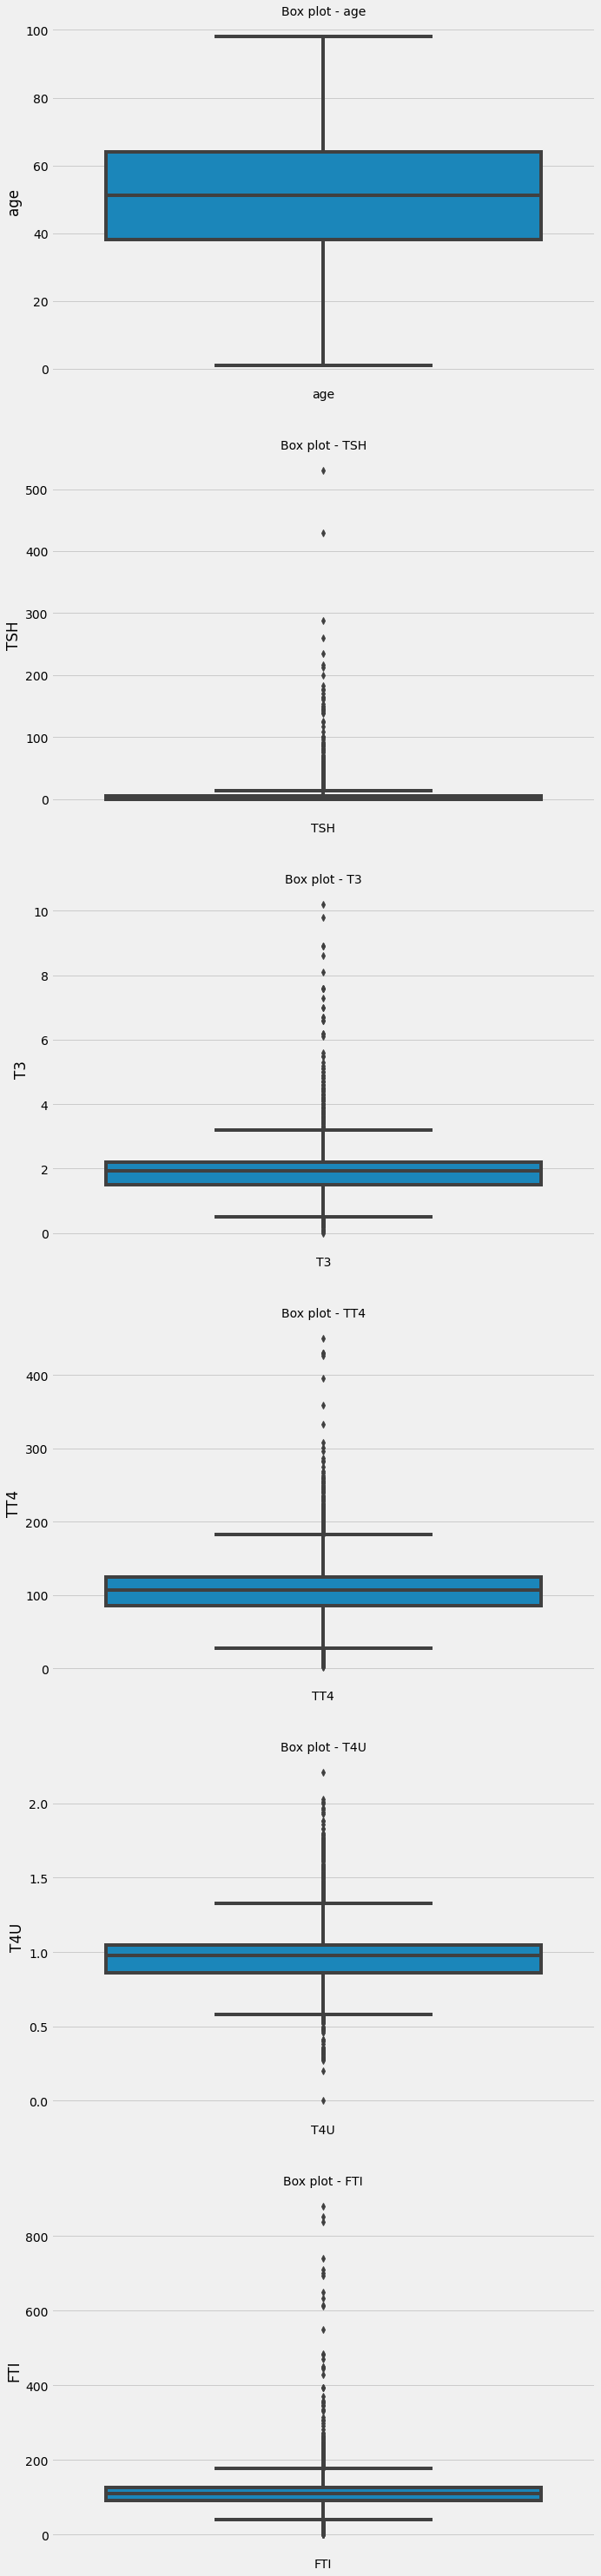

In [18]:
# checking for outliers
def plot_boxplots(target_dataframe,num_col):
    
    fig, ax = plt.subplots(len(num_col), figsize=(10,50))
    
    for i, column_name in enumerate(num_col):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=14)
        ax[i].set_xlabel(column_name, fontsize=14)
    
    
outlier_columns =['age','TSH','T3','TT4','T4U','FTI']
plt.style.use('fivethirtyeight')
plot_boxplots(data,outlier_columns)
plt.show()

The age column has no outliers while TSH,T3,TT4,T4U,FTI have outliers but there is nothing much we can do with our outliers since they contain necessary values for our predictions.

# 6. Exploratory Analysis

### Univariate Analysis

In [19]:
#this shows the descriptive statistics of the dataset
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.112538,5.809320,1.933666,108.706922,0.977559,115.489080
std,17.854431,22.180994,0.864826,42.836471,0.216873,57.780967
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.112538,1.000000,1.933666,107.000000,0.977559,110.000000
75%,64.000000,5.809320,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


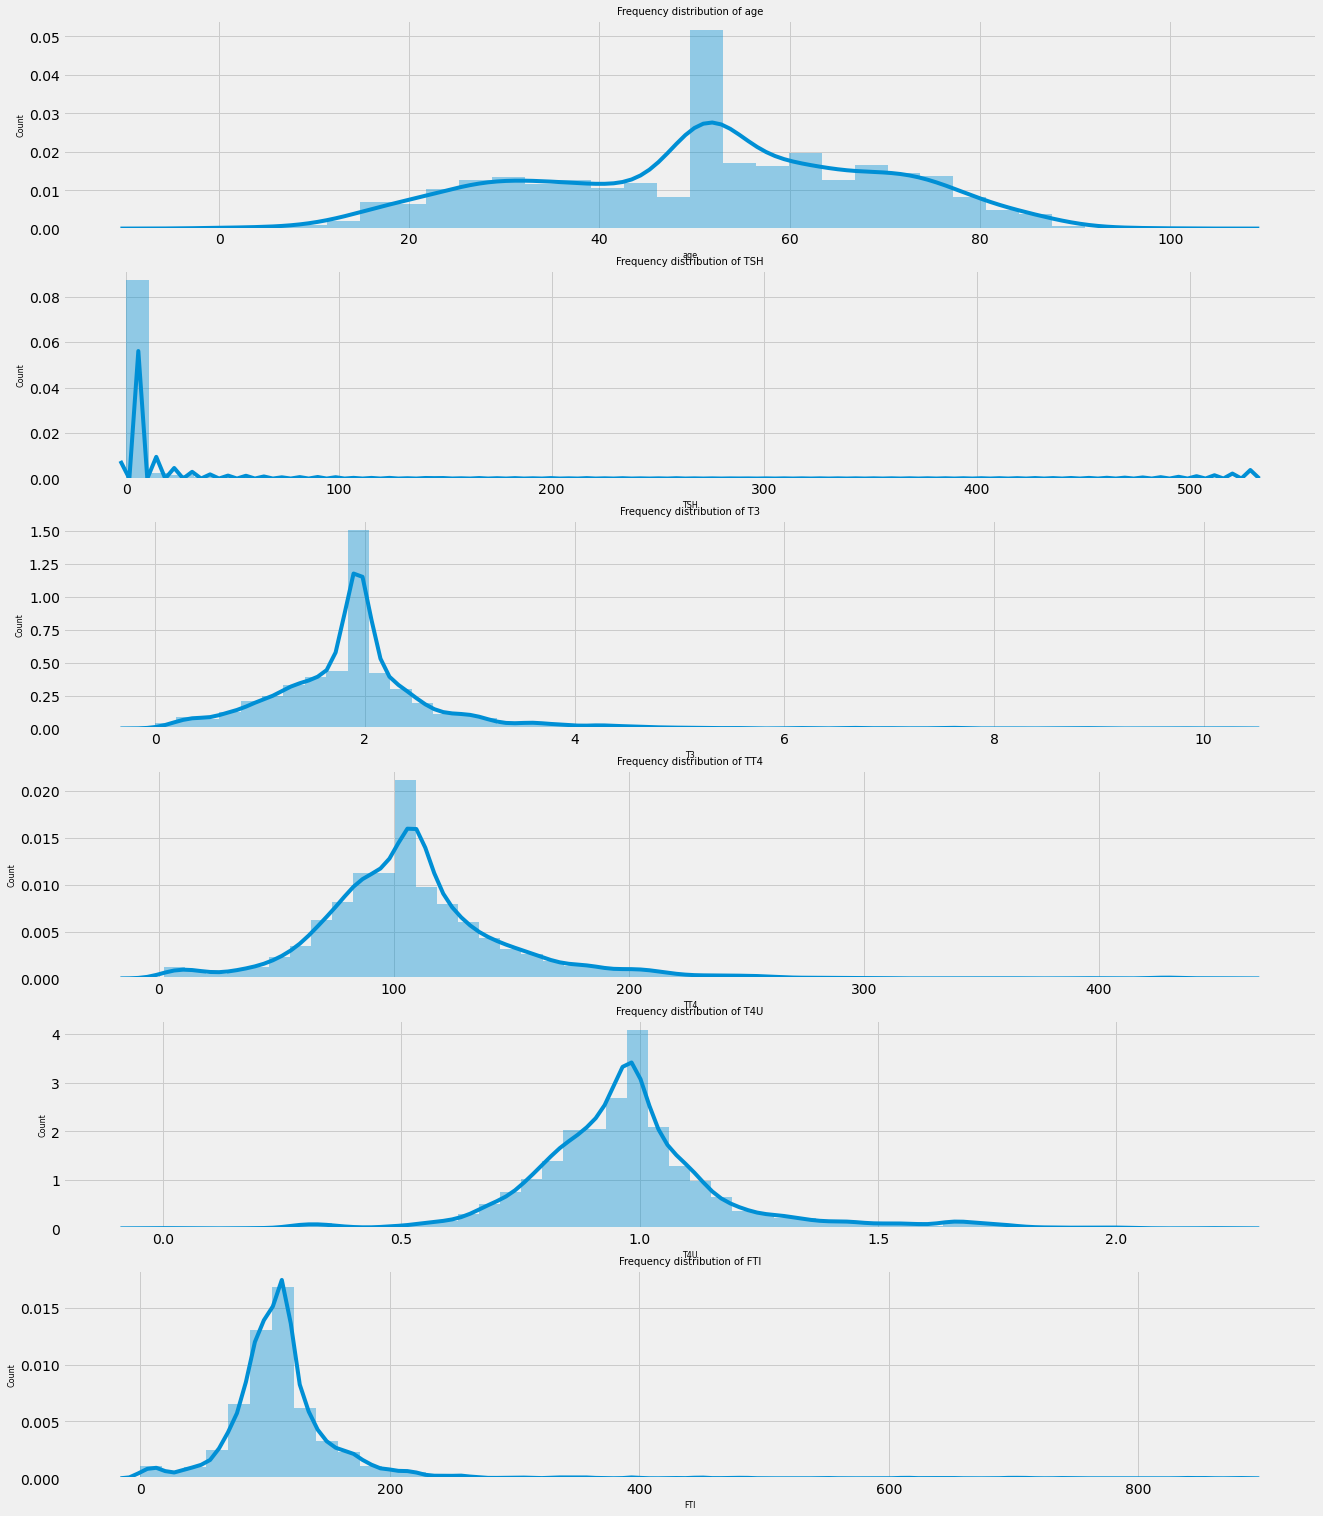

In [20]:
# distribution of numerical variables.

fig, ax = plt.subplots(len(num_col), figsize=(20,25))

for i, col_val in enumerate(num_col):

    sns.distplot(data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    

plt.show()

The age, TSH distribution is skewed to the left,while the rest seem somehow normally distributed.

Text(0.5, 0, 'status')

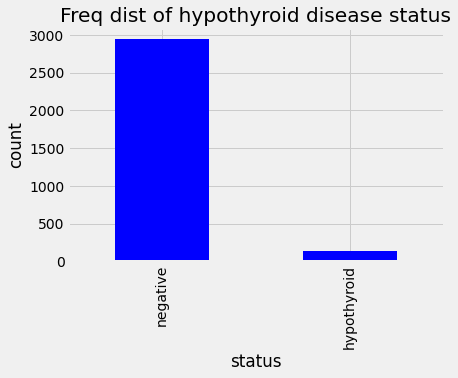

In [21]:
#Distribution of the disease status.
data['status'].value_counts().plot.bar(title='Freq dist of hypothyroid disease status', color = 'blue')
plt.ylabel('count')
plt.xlabel('status')

From the bar graph above alot of people are negative of hypothroid

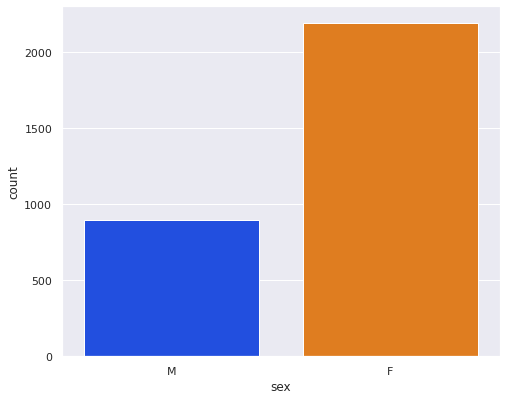

In [22]:
# frequency of the sex column
sns.set(rc={'figure.figsize':(7, 6)})
sns.set(style="darkgrid")
sns.countplot(x="sex", data=data, palette='bright')

The test were done to more females than males.

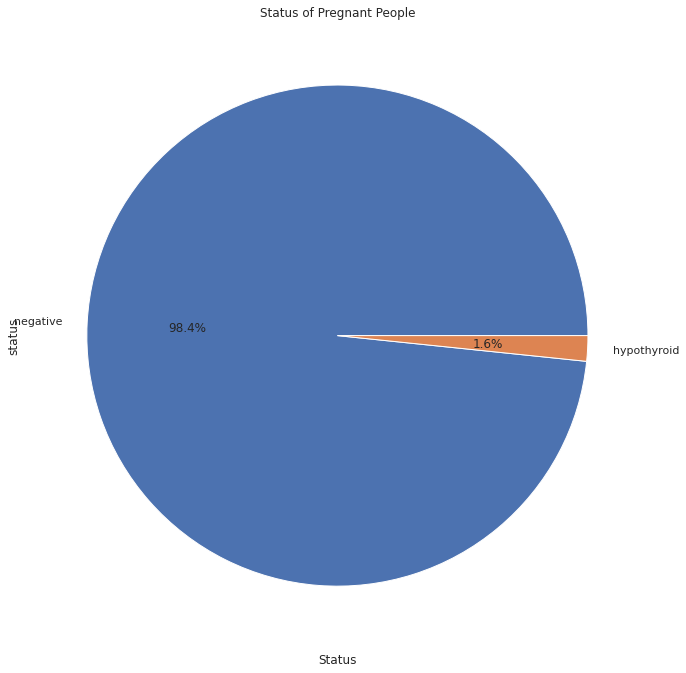

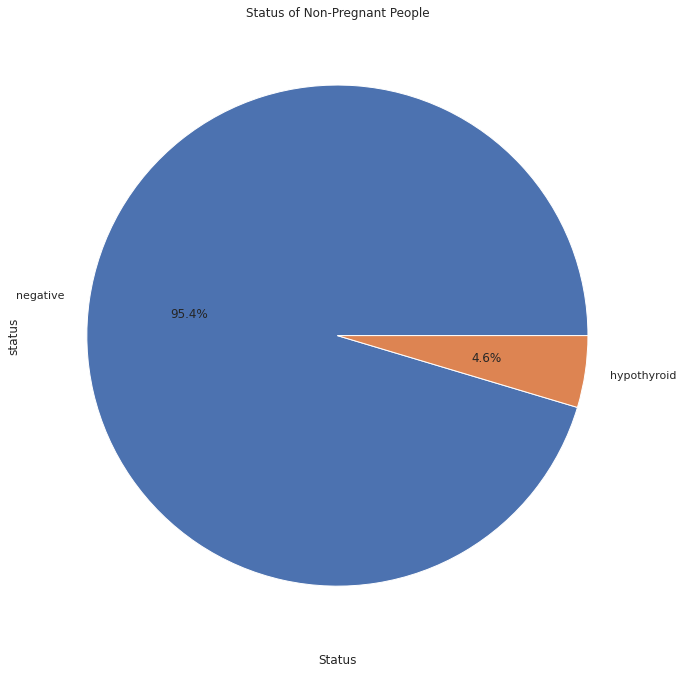

In [23]:
# distribution of status of the patients who are pregnant and those who are not.

# Pregnant 
fig, ax = plt.subplots(figsize = (10, 20))
data[data['pregnant'] == 't']['status'].value_counts().plot(kind='pie',autopct='%0.1f%%', title = 'Status of Pregnant People')
plt.xlabel('Status')
plt.show()

# Not pregnant
fig, ax = plt.subplots(figsize = (10, 20))
data[data['pregnant'] == 'f']['status'].value_counts().plot(kind='pie',autopct= '%0.1f%%',title = 'Status of Non-Pregnant People')
plt.xlabel('Status')
plt.show()

Alot of women that are not pregnant have hypothyroid.

### Bivariate Analysis

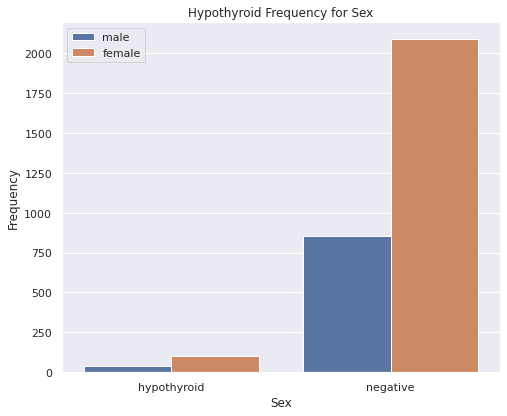

In [24]:
#Bar plot of sex vs status
ax = sns.countplot(x=data['status'], hue=data['sex'],data=data,orient="h", alpha=1)
plt.title('Hypothyroid Frequency for Sex')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(["male", "female"])
plt.ylabel('Frequency')
plt.show()

We have more females with hypithyroid compared to males.

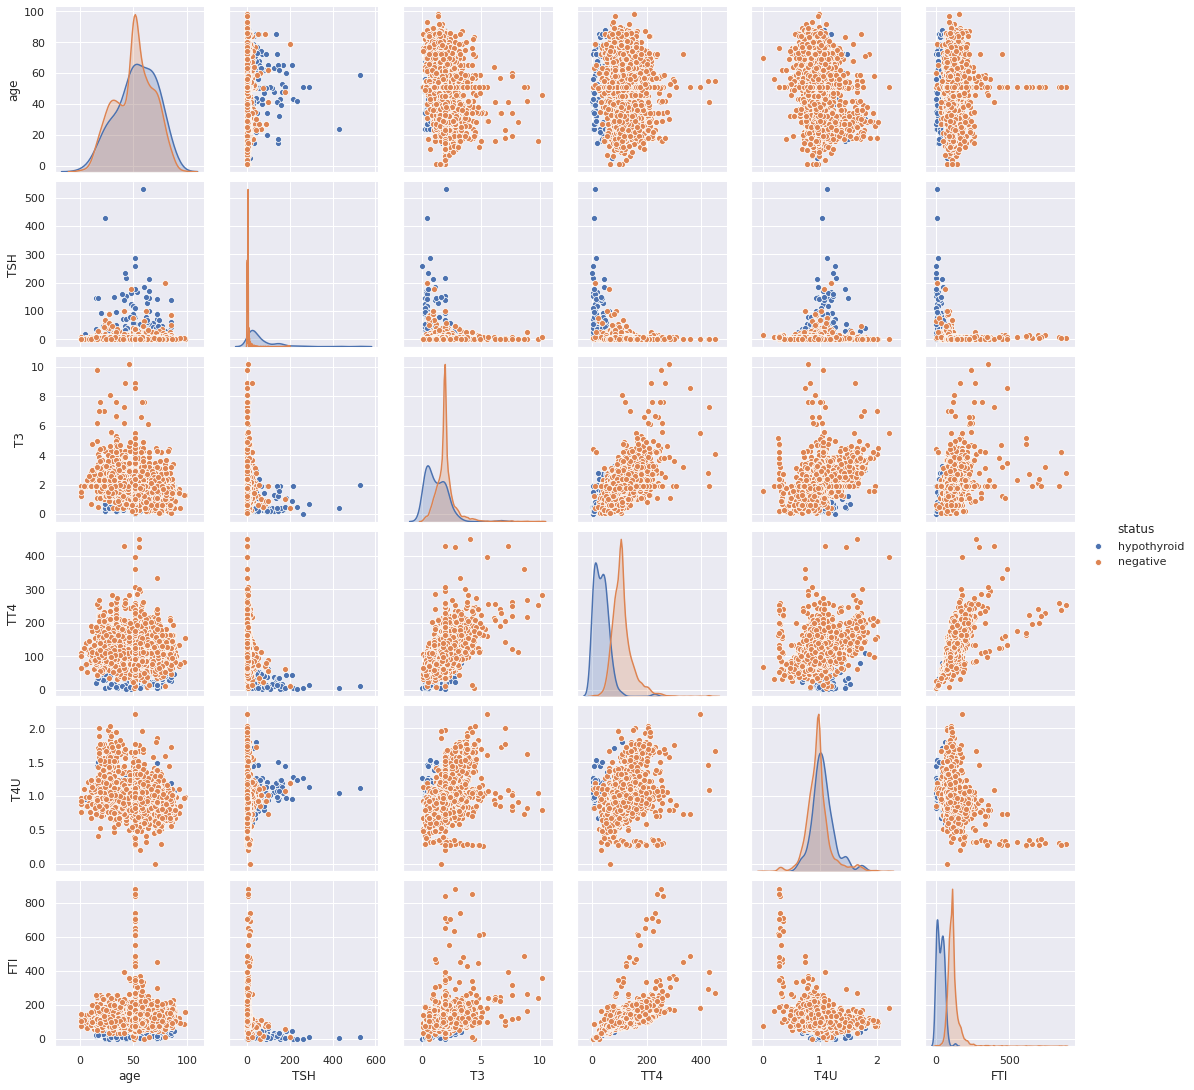

In [25]:
# Use of a pairplot to check for correlation between variables.

variables = ['age','TSH','T3','TT4','T4U','FTI']

sns.pairplot(data, kind="scatter", diag_kind="kde", vars=variables, hue="status")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(5.335000000000008, 0.5, 'TT4')

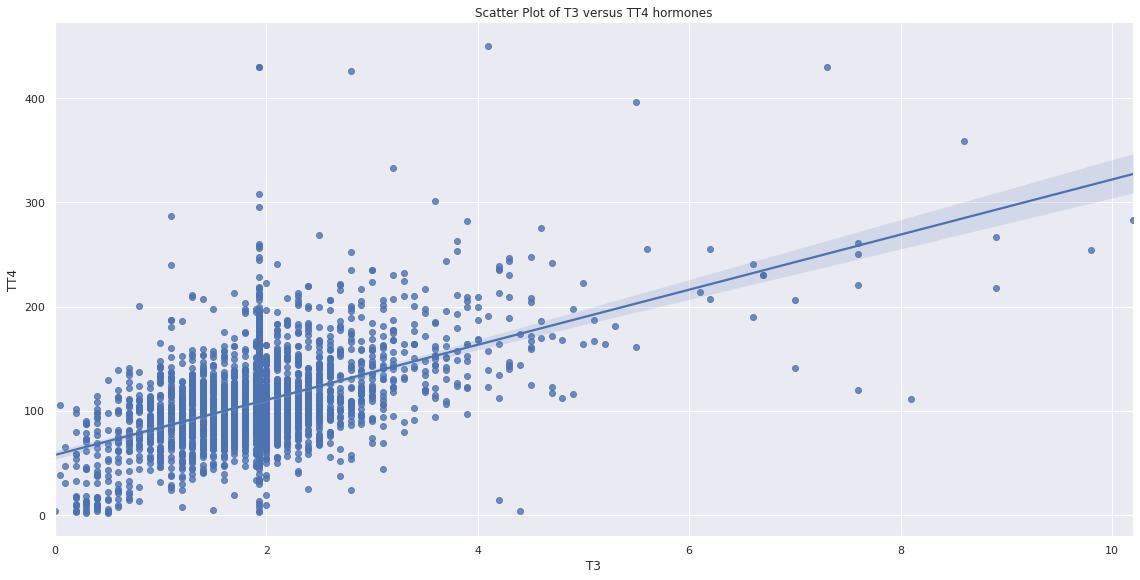

In [26]:
# Scatterplot of T3 versus TT4 hormones
sns.lmplot('T3', 'TT4',data=data,fit_reg=True,size=8,aspect =2)
plt.title('Scatter Plot of T3 versus TT4 hormones')
plt.xlabel('T3')
plt.ylabel('TT4')

We have a positive correlation between T3 and TT4 hormones

### Multivariate Analysis

### Feature Engineering

In [0]:
# Create a dictionary to manually encode the categorical data
dict_data = {"sex": {"M": 1, "F": 0},
             'status':{"negative":0,'hypothyroid':1},
              'on_thyroxine': {"t": 1, "f": 0},
               "query_on_thyroxine": {"t": 1, "f": 0},
                "on_antithyroid_medication": {"t": 1, "f": 0},
                "thyroid_surgery": {"t": 1, "f": 0},
                "query_hypothyroid": {"t": 1, "f": 0},
               "query_hyperthyroid": {"t": 1, "f": 0},
                "pregnant": {"t": 1, "f": 0},
                "sick" : {"t": 1, "f": 0},
                "tumor": {"t": 1, "f": 0},
                "lithium": {"t": 1, "f": 0},
                "goitre": {"t": 1, "f": 0},
                 "TSH_measured": {"y": 1, "n": 0},
                 "T3_measured": {"y": 1, "n": 0},
                  "TT4_measured": {"y": 1, "n": 0},
                  "T4U_measured": {"y": 1, "n": 0},
                  "FTI_measured": {"y": 1, "n": 0},
                  "TBG_measured": {"y": 1, "n": 0},
                }
data.replace(dict_data, inplace=True)

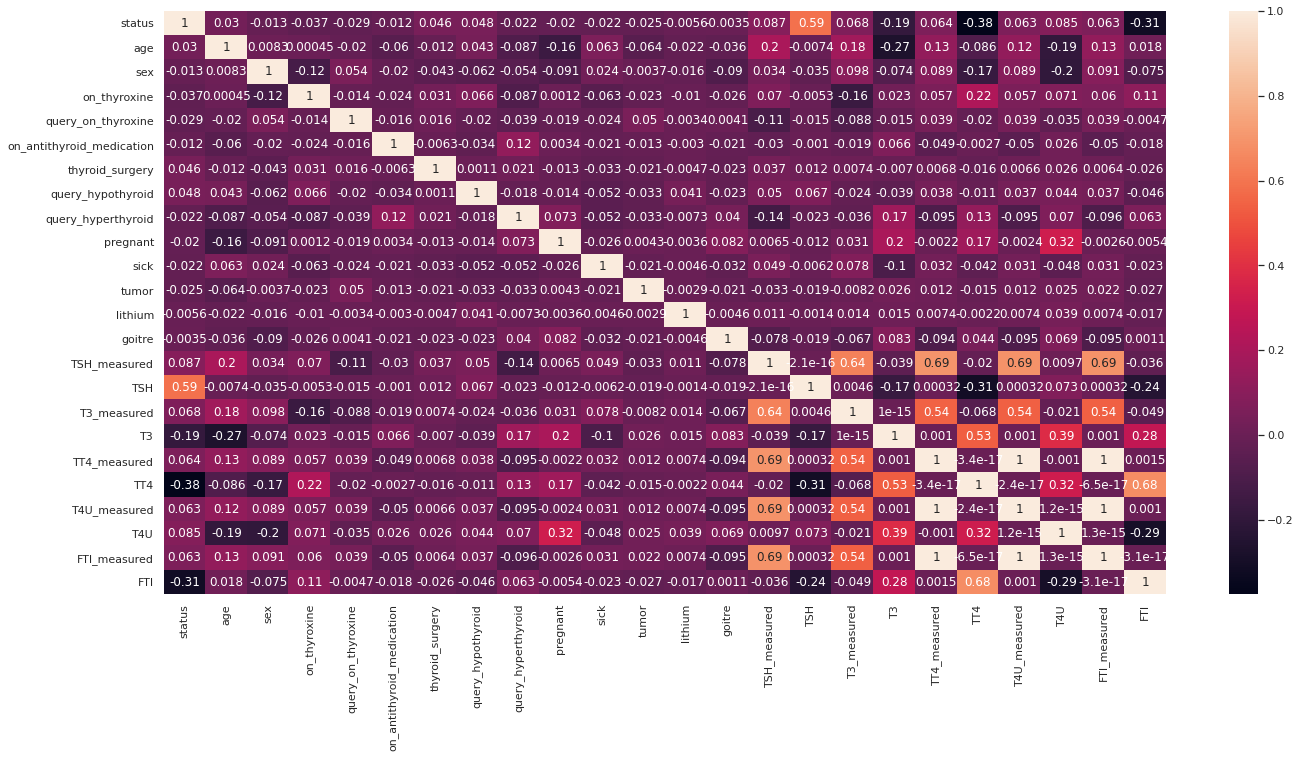

In [73]:

#visualizing the correlation between features
plt.figure(figsize=(20, 10))
corr = data.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);



> Principal component analysis (PCA)



In [28]:
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

In [0]:
#Separating features and labels /preprocessing
X = data[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI']].values
y = data["status"].values


In [0]:
#Split the data into a training set and testing set.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [31]:
X.shape

(3086, 23)

In [32]:
X

array([[ 72.  ,   1.  ,   0.  , ...,   1.48,   1.  ,  10.  ],
       [ 15.  ,   0.  ,   1.  , ...,   1.13,   1.  ,  17.  ],
       [ 24.  ,   1.  ,   0.  , ...,   1.  ,   1.  ,   0.  ],
       ...,
       [ 77.  ,   1.  ,   0.  , ...,   0.68,   1.  , 104.  ],
       [ 74.  ,   0.  ,   0.  , ...,   0.48,   1.  , 137.  ],
       [ 56.  ,   0.  ,   1.  , ...,   0.97,   1.  , 143.  ]])

In [0]:
#Normalisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Appying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [35]:
# checking the explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.76113172e-01, 1.06377800e-01, 7.26602327e-02, 5.75089257e-02,
       5.21822606e-02, 4.86900542e-02, 4.55980239e-02, 4.36848741e-02,
       4.27832561e-02, 4.16467876e-02, 4.11338190e-02, 3.90634309e-02,
       3.78092847e-02, 3.63869252e-02, 3.36590224e-02, 3.27814547e-02,
       3.21854610e-02, 2.47706011e-02, 1.80560726e-02, 1.25201966e-02,
       4.05890851e-03, 2.47102472e-04, 8.23334621e-05])

# 7. Implementing the Solution

### Part 1: Decision trees

#### Random Forest

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
y = data['status'].values
data.columns

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI']
X = data[test_features].values
# importing the random forest regressor
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 200, min_samples_split = 20,
                              max_depth = 5)

# fitting our model to our training data
forest.fit(X_train, y_train)

# make predictions using our forest
y_pred_rand = forest.predict(X_test)

In [62]:
# compare actual values with predicted values
compare = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_rand})
compare.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.040453,0.024272
std,0.197179,0.154017
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


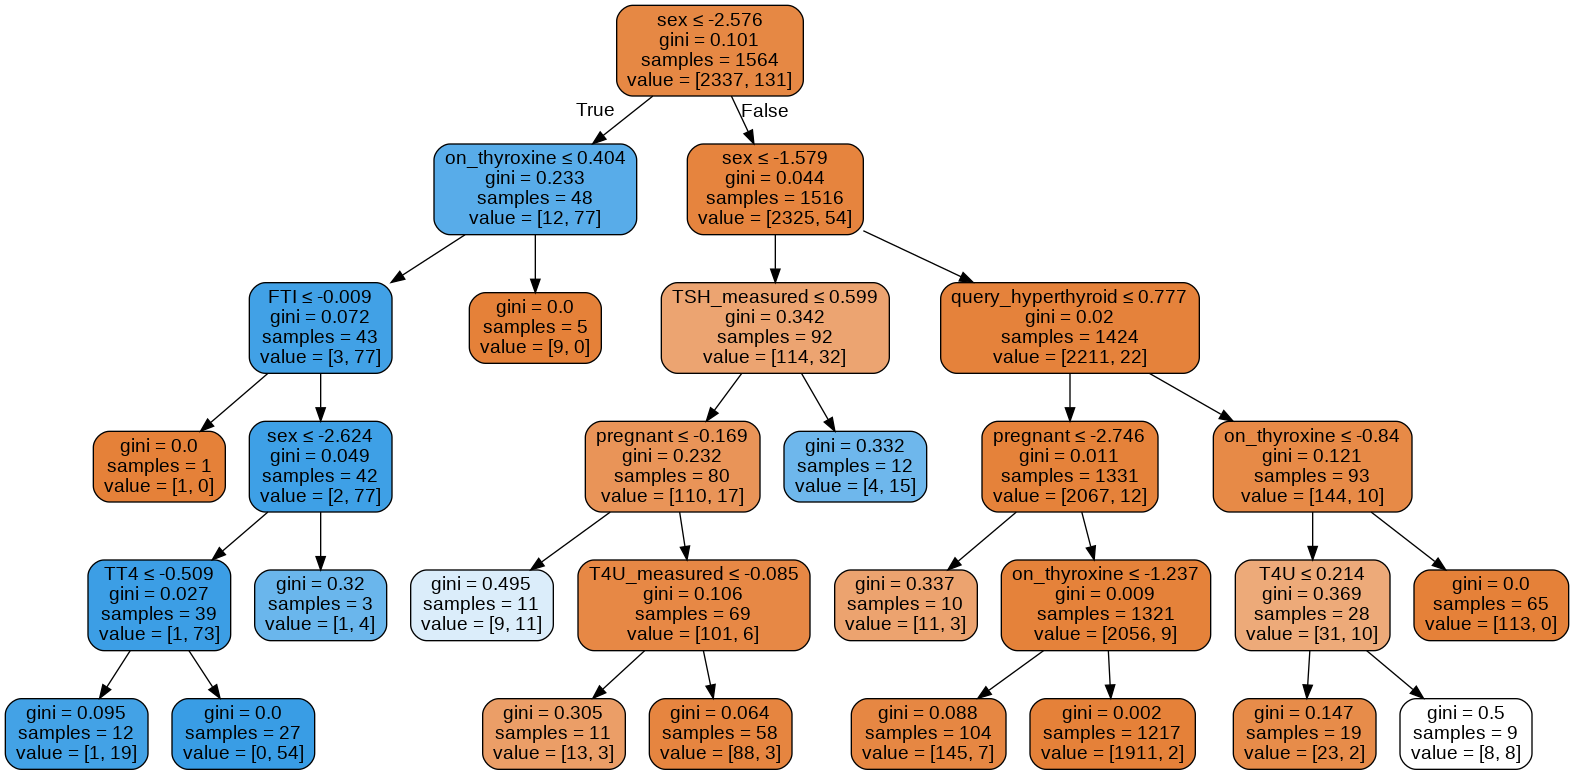

In [63]:
# Visualising the tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# Visualizing a tree from the random forest
y_pred_rand = forest.predict(X_test)
dot_data = StringIO()

# picks a specific tree from the forest
tree = forest.estimators_[20]

export_graphviz(tree, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

In [64]:
# to get the importance levels of our features
importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(test_features, importances)]

# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
feature_importances

[('sex', 0.73),
 ('on_thyroxine', 0.1),
 ('TSH_measured', 0.08),
 ('pregnant', 0.05),
 ('T4U', 0.02),
 ('query_hyperthyroid', 0.01),
 ('FTI', 0.01),
 ('age', 0.0),
 ('query_on_thyroxine', 0.0),
 ('on_antithyroid_medication', 0.0),
 ('thyroid_surgery', 0.0),
 ('query_hypothyroid', 0.0),
 ('sick', 0.0),
 ('tumor', 0.0),
 ('lithium', 0.0),
 ('goitre', 0.0),
 ('TSH', 0.0),
 ('T3_measured', 0.0),
 ('T3', 0.0),
 ('TT4_measured', 0.0),
 ('TT4', 0.0),
 ('T4U_measured', 0.0),
 ('FTI_measured', 0.0)]

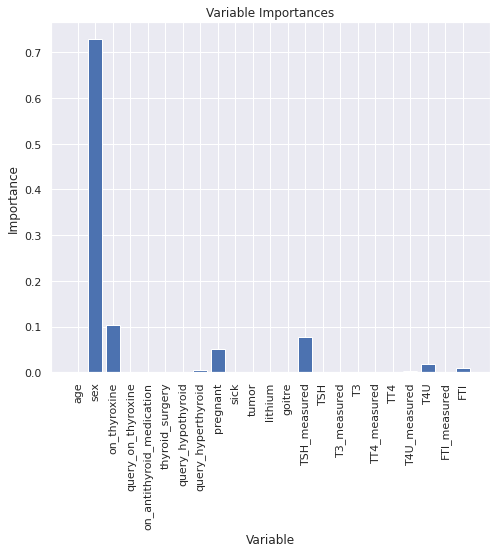

In [65]:
# lets visualize it

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [66]:
# evaluating accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred_rand))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred_rand))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_rand)))


Mean Absolute Error: 0.016181229773462782
Mean Squared Error: 0.016181229773462782
Root Mean Squared Error: 0.12720546282869608


In [67]:
print("R2 score : %.2f" % r2_score(y_test,y_pred_rand))
print('accuracy_score:',accuracy_score (y_test , y_pred_rand))


#computing the F1 score since the data is unbalanced
print('F1_score, average = micro:',f1_score(y_test, y_pred_rand, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred_rand, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred_rand, average='weighted'))

R2 score : 0.58
accuracy_score: 0.9838187702265372
F1_score, average = micro: 0.9838187702265372
F1_score, average = macro: 0.870819397993311
F1_score, average = weighted: 0.9818637637865161


Random forest model got Root Mean Squared Error of 0.12720546282869608 whis is low and an accuracy score of  98.38% which is good for predictions.

#### AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostRegressor

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state = 0)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)


# comparing actual values to predicted values
ada_boost = pd.DataFrame({'Actual' : y_test , 'Predicted' : y_pred_ada})

# previewing our summary statistics
ada_boost.describe()



,Actual,Predicted
count,618.000000,618.000000
mean,0.040453,0.158704
std,0.197179,0.145043
min,0.000000,0.000000
25%,0.000000,0.057793
50%,0.000000,0.106351
75%,0.000000,0.210903
max,1.000000,0.790698


In [70]:
# evaluating accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))
print('accuracy_score:',accuracy_score (y_test , y_pred))


Mean Absolute Error: 0.1497412255508201
Mean Squared Error: 0.03722740815574266
Root Mean Squared Error: 0.19294405447108925
accuracy_score: 0.982200647249191


Ada boost got RMSE of 0.19294405447108925 and an accuracy score of 98.22% slightly below random forest but the difference is insignificant.

#### Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# setting different learning rates, so that we can compare the performance of 
# the classifier's performance at different learning rates
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    grad = GradientBoostingClassifier(n_estimators = 200, max_depth = 2,
                                     learning_rate = learning_rate,
                                     random_state = 0)
    grad.fit(X_train, y_train)

    print("Learning rate:", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(grad.score(X_train,y_train)))                                                               
    print("Accuracy score (validation): {0:.3f}".format(grad.score(X_test,y_test)))

Learning rate: 0.05
Accuracy score (training): 0.989
Accuracy score (validation): 0.985
Learning rate: 0.075
Accuracy score (training): 0.995
Accuracy score (validation): 0.987
Learning rate: 0.1
Accuracy score (training): 0.999
Accuracy score (validation): 0.989
Learning rate: 0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.985
Learning rate: 0.5
Accuracy score (training): 0.991
Accuracy score (validation): 0.982
Learning rate: 0.75
Accuracy score (training): 0.982
Accuracy score (validation): 0.981
Learning rate: 1
Accuracy score (training): 0.992
Accuracy score (validation): 0.977


We can see that a learning rate of 0.1 gives us the best performance when it comes to validating, and good performance when it comes to training so we will use it as our parameter.

In [44]:
# now to use our selected learning rate to model
grad2 = GradientBoostingClassifier(n_estimators = 200, max_depth = 2, 
                                  learning_rate = 0.1, random_state = 0)

# fitting to training data
grad2.fit(X_train, y_train)

# making predictions
grad2_y_pred = grad2.predict(X_test)

# comparing actual values to predicted values
grad2_compare = pd.DataFrame({'Actual' : y_test,'Predicted' : grad2_y_pred})
                        
# previewing our summary statistics
grad2_compare.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.040453,0.032362
std,0.197179,0.177104
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [45]:
# evaluating accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grad2_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grad2_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grad2_y_pred)))

Mean Absolute Error: 0.011326860841423949
Mean Squared Error: 0.011326860841423949
Root Mean Squared Error: 0.10642772590553623


In [46]:

print("R2 score : %.2f" % r2_score(y_test,grad2_y_pred))
print('accuracy_score:',accuracy_score (y_test , grad2_y_pred))


#computing the F1 score since the data is unbalanced
print('F1_score, average = micro:',f1_score(y_test, grad2_y_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, grad2_y_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, grad2_y_pred, average='weighted'))

R2 score : 0.71
accuracy_score: 0.988673139158576
F1_score, average = micro: 0.988673139158576
F1_score, average = macro: 0.9192835152532886
F1_score, average = weighted: 0.9880676450581809


Gradient boosting has an RMSE of 0.10642772590553623 and accuracy score of 98.86%.It has performed slightly better than random forest and ada boost.

###  Part 2: SVM

In [47]:
# Here we will use Randomized search to find the best parameters for the model

# Creating a dictionary
# Specifying the parameters we want to tune

params = {'C': [0.001, 0.01, 0.1, 1, 10],
          'gamma': [0.001, 0.01, 0.1, 1]}

svc = SVC()

search = RandomizedSearchCV(estimator = svc, 
                      param_distributions = params, 
                      scoring = 'accuracy',
                      n_jobs = 1, 
                      cv = 10 )
                
                
search.fit(X,y)
search.best_params_

{'C': 10, 'gamma': 0.01}

#### Linear Kernel Function

In [48]:
# importing our SVM model and setting kernel to linear

from sklearn.svm import SVC
# Building the svm model with default parametres.
#
linear_model = SVC(kernel = 'linear',C= 10, gamma= 0.001 )
# Train the model using the training set
#
linear_model.fit(X_train,y_train)
# Predict the response for the test set
linear_y_pred = linear_model.predict(X_test)
linear_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:


# assessing the model
from sklearn.metrics import confusion_matrix, accuracy_score

print("Linear kernel score:", accuracy_score(y_test, linear_y_pred))
print("Linear kernel confusion matrix:\n", confusion_matrix(y_test, linear_y_pred))

Linear kernel score: 0.988673139158576
Linear kernel confusion matrix:
 [[592   1]
 [  6  19]]


In [50]:
print(classification_report(y_test,linear_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       593
           1       0.95      0.76      0.84        25

    accuracy                           0.99       618
   macro avg       0.97      0.88      0.92       618
weighted avg       0.99      0.99      0.99       618



The average precision is 0.99

The SVC model using linear kernel yielded 98.86% accuracy.

#### Polymomial kernel function

In [51]:
# Building the model 
polyclassifier = SVC(kernel='poly',C= 10, gamma= 0.001 )
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
# making prediction
y_pred_poly = polyclassifier.predict(X_test)
# Model Evaluation
print( accuracy_score(y_test, y_pred_poly))
print(confusion_matrix(y_test, y_pred_poly))

0.959546925566343
[[593   0]
 [ 25   0]]


In [53]:
print(classification_report(y_test,y_pred_poly))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       593
           1       0.00      0.00      0.00        25

    accuracy                           0.96       618
   macro avg       0.48      0.50      0.49       618
weighted avg       0.92      0.96      0.94       618



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The average precision is 0.92

The SVC model using polynomial kernel yielded 95.95% accuracy, the linear kernel performed better.

#### Radial basis function (rbf)

In [54]:
# Building the model 
rbfclassifier = SVC(kernel='rbf',C= 10, gamma= 0.001 )
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
# making prediction
y_pred_rbf = rbfclassifier.predict(X_test)
# Model Evaluation
print( accuracy_score(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))

0.982200647249191
[[590   3]
 [  8  17]]


In [56]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       593
           1       0.85      0.68      0.76        25

    accuracy                           0.98       618
   macro avg       0.92      0.84      0.87       618
weighted avg       0.98      0.98      0.98       618



The average precision is 0.98

The SVC model using rbf kernel yielded 98.22% accuracy, the linear kernel still has a better score.

# 8. Challenging the solution

We are going to challenge the solution using the sigmoid function

In [57]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid',C= 10, gamma= 0.001)
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
# making prediction
y_pred_sig = sigclassifier.predict(X_test)
# Model Evaluation
print( accuracy_score(y_test, y_pred_sig))
print(confusion_matrix(y_test, y_pred_sig))

0.9838187702265372
[[591   2]
 [  8  17]]


The sigmoid has outperformed the polynomial and the rbf.

### Conclusion

From the above analysis we conclude that all our models performed well since they all had low RMSE and accuracy scores of above 90%.
But since our analysis is on thyroid patients we would like to go with the best score since we dealing with human life. Hence in decision trees we would recommend the Gradient boosting model while in the SVM we go with the linear kernel for best predictions.

# 9. Follow up questions

### a). Did we have the right data?

My data was absolutely right to answer the prediction question

### b). Do we need other data to answer our question?

Yes , more informatives features would have boosted our predictions.There were also several instances of overfitting

### c). Did we have the right question?

The questions were right the data given was not enough to answer them accurately. Probably more data needs to be sought so as to improve the model and have even a higher accuracy score which is needed in this model.